In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore') 

In [15]:
df = pd.read_csv('Churn.csv')
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [10]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [17]:
df.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [23]:
#Convert 'TotalCharges' to numeric, forcing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(subset=['Total Charges'], inplace=True)
    
df.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                float64
dtype: object

In [24]:
#Pre process data

# Drop the Customer ID column
df.drop("Customer ID", axis=1, inplace=True)

# Convert 'Total Charges' to numeric, coerce errors (e.g., empty strings)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace = True)

# Drop rows with missing values
#df.dropna(inplace=True)

#Handling categorical values
# Encode categorical features (except the target)
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Encode target variab
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7033 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7033 non-null   int64  
 1   Senior Citizen     7033 non-null   int64  
 2   Partner            7033 non-null   int64  
 3   Dependents         7033 non-null   int64  
 4   tenure             7033 non-null   int64  
 5   Phone Service      7033 non-null   int64  
 6   Multiple Lines     7033 non-null   int64  
 7   Internet Service   7033 non-null   int64  
 8   Online Security    7033 non-null   int64  
 9   Online Backup      7033 non-null   int64  
 10  Device Protection  7033 non-null   int64  
 11  Tech Support       7033 non-null   int64  
 12  Streaming TV       7033 non-null   int64  
 13  Streaming Movies   7033 non-null   int64  
 14  Contract           7033 non-null   int64  
 15  Paperless Billing  7033 non-null   int64  
 16  Payment Method     7033 non-n

In [9]:
# Feature Scaling and Splitting

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
#Build the TensorFlow Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5828 - loss: 0.6634 - val_accuracy: 0.7753 - val_loss: 0.4479
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7913 - loss: 0.4384 - val_accuracy: 0.7869 - val_loss: 0.4306
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7772 - loss: 0.4432 - val_accuracy: 0.7922 - val_loss: 0.4258
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7902 - loss: 0.4361 - val_accuracy: 0.7948 - val_loss: 0.4157
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8088 - loss: 0.4180 - val_accuracy: 0.8002 - val_loss: 0.4189
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8147 - loss: 0.4100 - val_accuracy: 0.8002 - val_loss: 0.4184
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8090 - loss: 0.4067 - val_accuracy: 0.8020 - val_loss: 0.4159
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8068 - loss: 0.4167 - val_accuracy: 

In [12]:
# Evaluate and Predict

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict (returns probabilities)
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype("int32")

# Show first 10 predictions
print(predicted_labels[:10].flatten())


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7772 - loss: 0.4300
Test Accuracy: 0.78
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[0 0 0 1 0 1 1 0 0 0]


In [13]:
#Save and Reload the Model

# Save the model
model.save("churn_model.h5")

# Reload it
loaded_model = tf.keras.models.load_model("churn_model.h5")

# Test reloaded model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print('/n')
print(f"Reloaded Model Accuracy: {accuracy:.2f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7772 - loss: 0.4300
/n
Reloaded Model Accuracy: 0.78


Churn
No     5175
Yes    1869
Name: count, dtype: int64


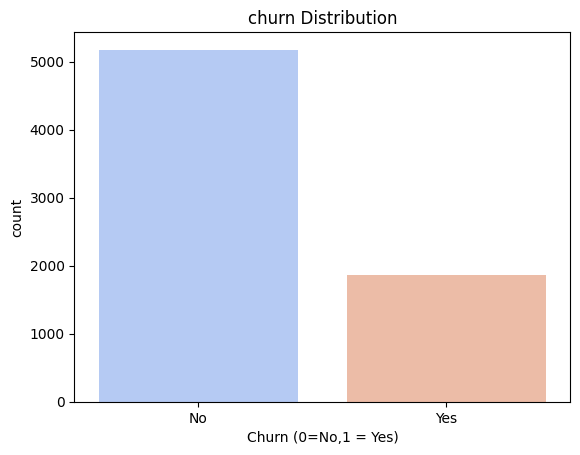

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['Churn'].value_counts())
sns.countplot(x='Churn',data=df,palette='coolwarm')
plt.title('churn Distribution')
plt.xlabel('Churn (0=No,1 = Yes)')
plt.ylabel('count')
plt.show()

Gender
Male      3555
Female    3489
Name: count, dtype: int64


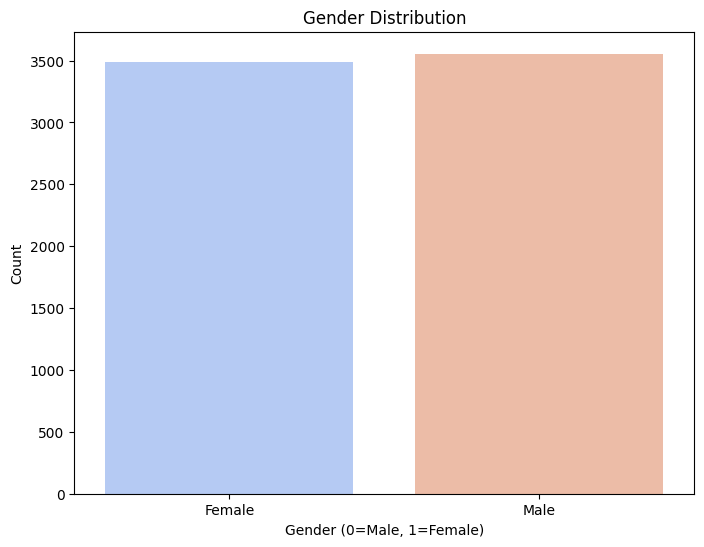

In [8]:
plt.figure(figsize=(8, 6))
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

Senior Citizen
0    5902
1    1142
Name: count, dtype: int64


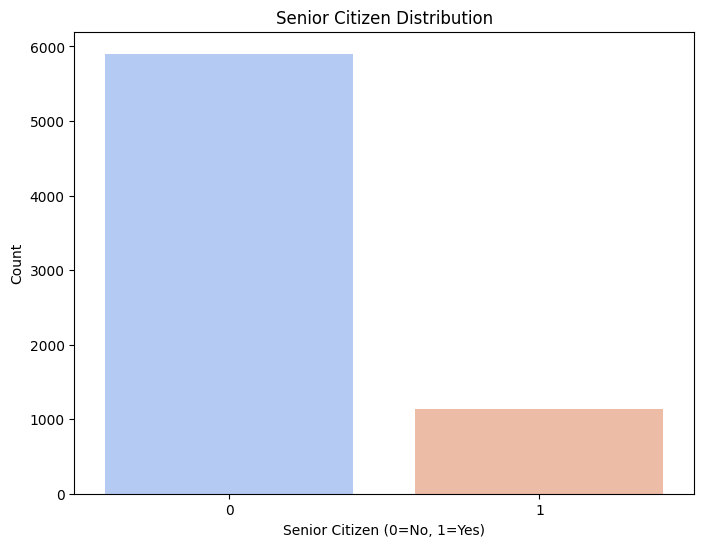

In [9]:
plt.figure(figsize=(8, 6))
print(df['Senior Citizen'].value_counts())
sns.countplot(x='Senior Citizen', data=df, palette='coolwarm')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()